In [40]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/kelly1984.csv", sep=',')
df

,heelstick,catheter
0,23.0,25.2
1,33.2,26.0
2,16.6,16.3
3,26.3,27.2
4,20.0,23.2
5,20.0,18.1
6,20.6,22.2
7,18.9,17.2
8,17.8,18.8
9,20.0,16.4


In [3]:
X0 = np.ascontiguousarray(df.values)
N = len(X0)
W = X0[:,0].max() - X0[:,0].min()
H = X0[:,1].max() - X0[:,1].min()
W /= 4
H /= 4
print(W,H)

5.000000000000001 4.1


In [9]:
alpha = (N-3)/N
print(alpha)

0.85


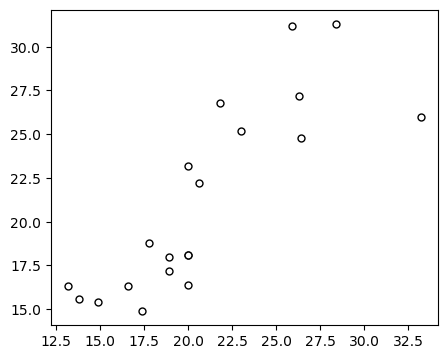

In [10]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', s=25, edgecolors='k')
plt.show()

In [11]:
c, As, Ls = pca.find_loc_and_pc(X0)
Us = pca.transform(X0, c, As)
print(Us.shape)

(20, 2)


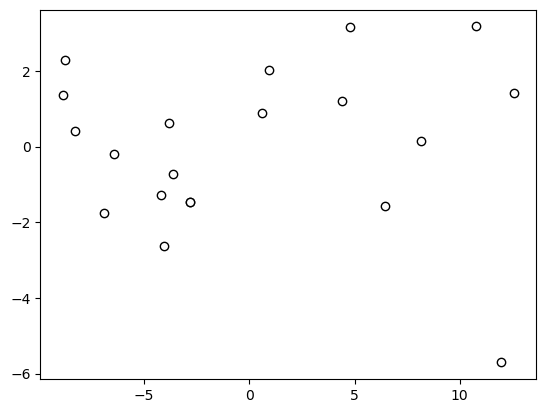

In [12]:
plt.scatter(Us[:,0], Us[:,1], c='w', edgecolors="k")
plt.show()

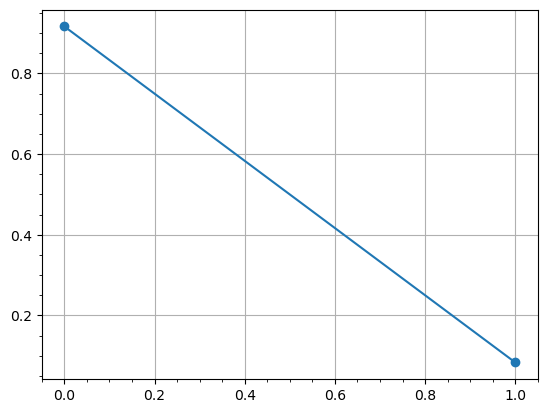

In [13]:
plt.plot(Ls/Ls.sum(), marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

[20.855 21.150]


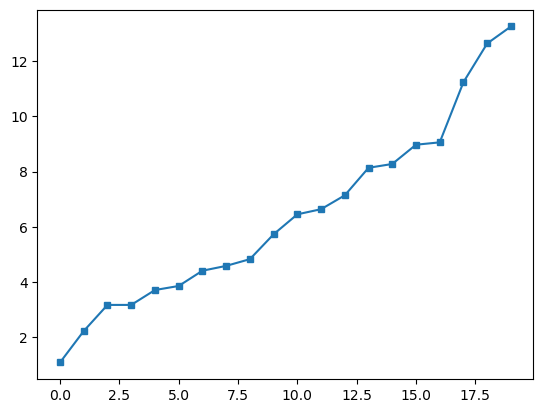

In [14]:
c0 = pca.location(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=4)
plt.show()

[20.855 21.150]


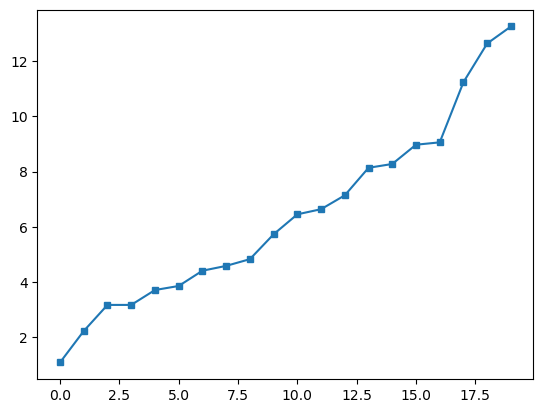

In [15]:
# alpha = (N-5)/N
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [16]:
X1 = X0 - c
X1_0 = X0 - c0

K: 7 L: 48.016274470520656 PC: [0.683 0.731]
* 48.016274470520656
48.016274470520656 [0.683 0.731]


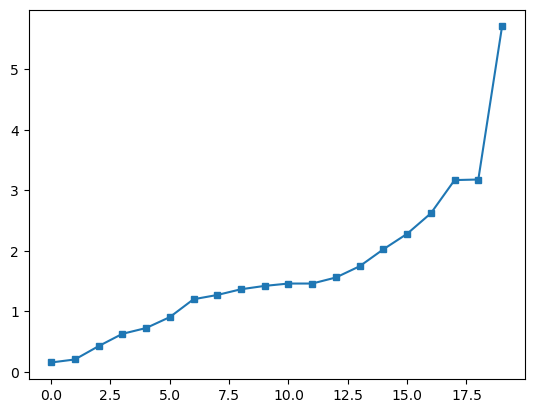

In [17]:
a1_0, L1_0 = pca.find_pc(X1_0, tol=1.0e-9, verbose=1)
print(L1_0, a1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='s', markersize=4)
plt.show()

47.58816505475773 [0.607 0.795]


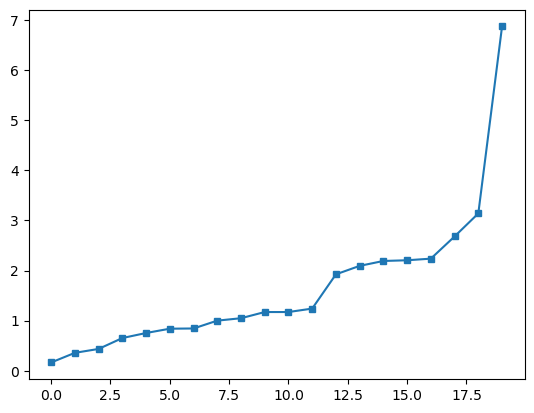

In [18]:
# alpha = (N-3)/N
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca._find_robust_pc(X1, wma, tol=1.0e-9)
print(L1, a1)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=4)
plt.show()

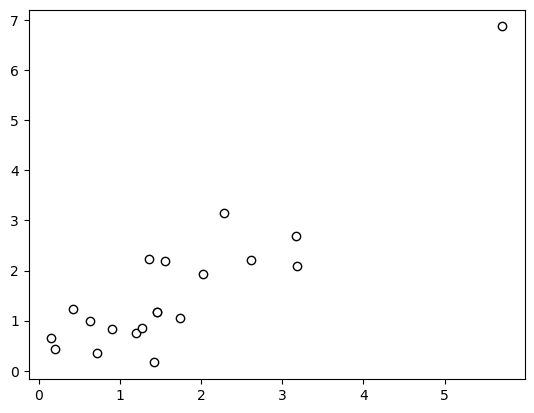

In [19]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1), c='w', edgecolors='k')
plt.show()

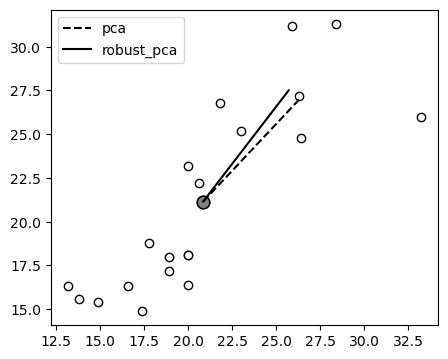

In [20]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='grey', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='grey', edgecolors='k')
plt.plot([c0[0], c0[0]+8*a1_0[0]], [c0[1], c0[1]+8*a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+8*a1[0]], [c[1], c[1]+8*a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

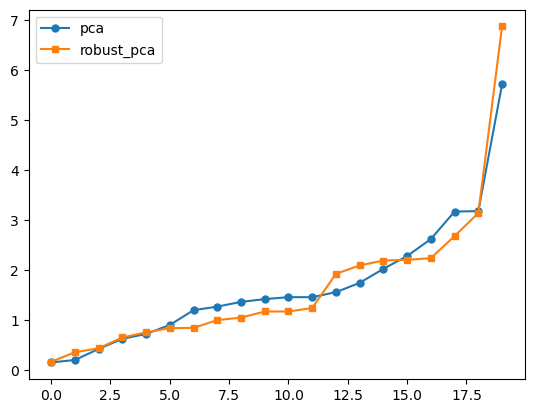

In [21]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=5, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=5, label='robust_pca')
plt.legend()
plt.show()

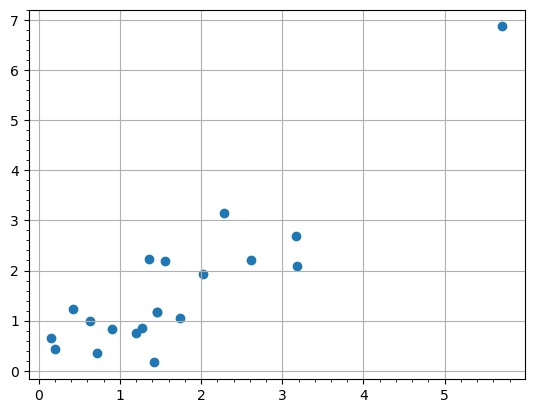

In [22]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [23]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [24]:
a2_0, L2_0 = pca.find_pc(X2_0, tol=1.0e-9)
print(L2_0, a2_0, a2_0 @ a2_0)

4.373700529471634 [-0.731  0.683] 1.0


In [25]:
# alpha = (N-5)/N
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca._find_robust_pc(X2, wma, tol=1.0e-9)
print(L2, a2)
print(a1 @ a2)

5.343036740369286 [ 0.795 -0.607]
0.0


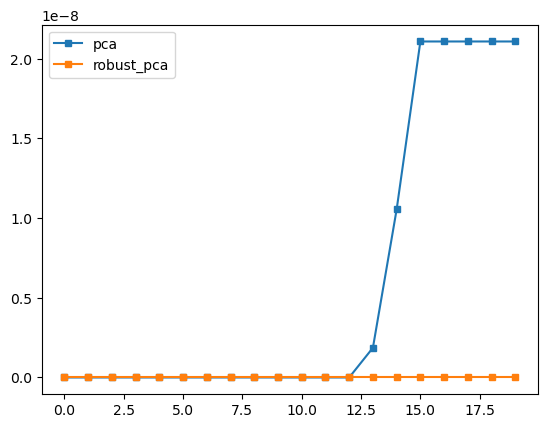

In [26]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


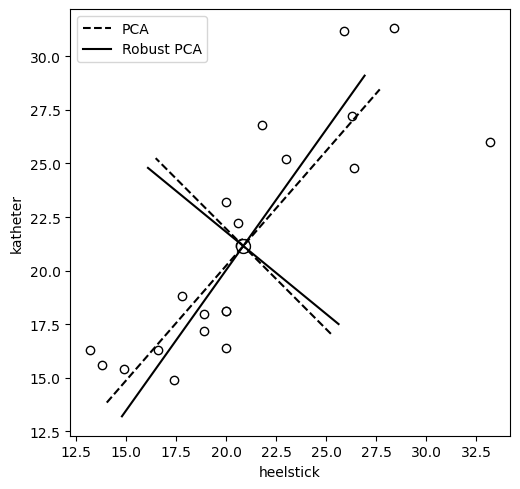

In [27]:
aa = 16/9
plt.figure(figsize=(5.3, 5.0))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]-10*a1_0[0], c0[0], c0[0]+10*a1_0[0]], [c0[1]-10*a1_0[1], c0[1], c0[1]+10*a1_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c0[0]-6*a2_0[0], c0[0], c0[0]+6*a2_0[0]], [c0[1]-6*a2_0[1], c0[1], c0[1]+6*a2_0[1]], 
         c='k', linestyle='--')
plt.plot([c[0]-10*a1[0], c[0], c[0]+10*a1[0]], [c[1]-10*a1[1], c[1], c[1]+10*a1[1]], 
         c='k', label='Robust PCA')
plt.plot([c[0]-6*a2[0], c[0], c[0]+6*a2[0]], [c[1]-6*a2[1], c[1], c[1]+6*a2[1]], 
         c='k')
plt.legend()
plt.xlabel('heelstick')
plt.ylabel('katheter')
plt.tight_layout()
plt.savefig('fig/robust_pca_kelly_0.eps')
plt.show()

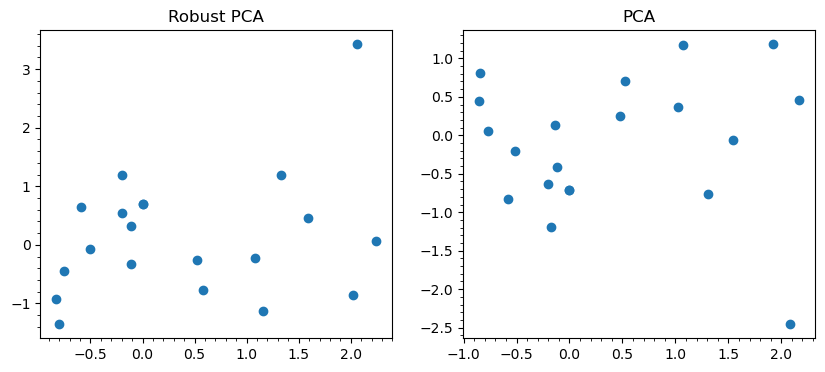

In [28]:
from mlgrad.inventory import modified_zscore
U1 = modified_zscore(X1 @ a1)
U2 = modified_zscore(X1 @ a2)

U1_0 = modified_zscore(X1_0 @ a1_0)
U2_0 = modified_zscore(X1_0 @ a2_0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2)
plt.minorticks_on()
plt.subplot(1,2,2)
plt.title('PCA')
plt.scatter(U1_0, U2_0)
plt.minorticks_on()
plt.savefig('fig/robust_pca_starsCYG_transformed.eps')
plt.show()

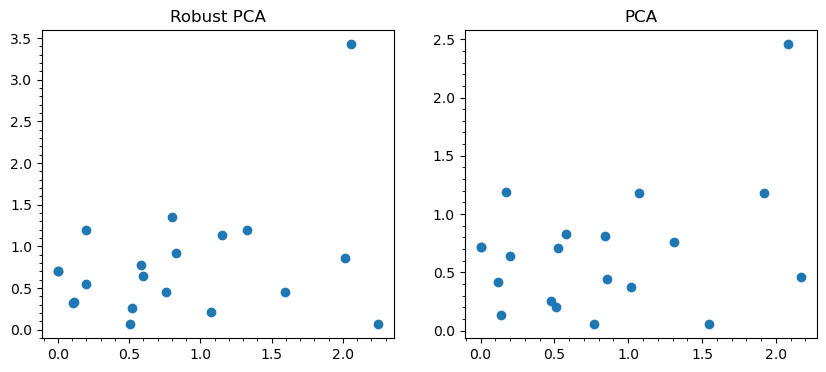

In [30]:
from mlgrad.inventory import modified_zscore

ZU1 = abs(modified_zscore(U1))
ZU2 = abs(modified_zscore(U2))

ZU1_0 = abs(modified_zscore(U1_0))
ZU2_0 = abs(modified_zscore(U2_0))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Robust PCA')
plt.scatter(ZU1, ZU2)
plt.minorticks_on()
plt.subplot(1,2,2)
plt.title('PCA')
plt.scatter(ZU1_0, ZU2_0)
plt.minorticks_on()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


37.218101867143886 45.71654189367949


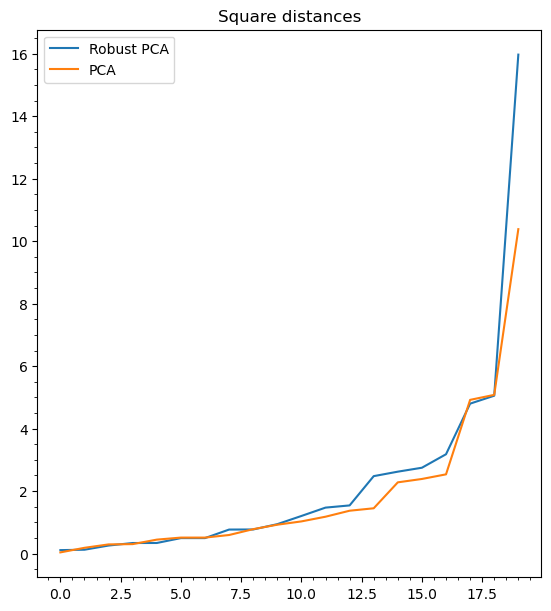

In [31]:
D = U1 * U1 + U2 * U2
D_0 = U1_0 * U1_0 + U2_0 * U2_0

print(D_0.sum(), D.sum())

plt.figure(figsize=(6.5,4*aa))
plt.title('Square distances')
plt.plot(sorted(D), label='Robust PCA')
plt.plot(sorted(D_0), label='PCA')
plt.minorticks_on()
plt.legend()
plt.savefig('fig/robust_pca_starsCYG_SD.eps')
plt.show()

In [41]:
from mlgrad.pca.location_scatter import robust_location_scatter, robust_location

In [58]:
wma = af.averaging_function("WM", rhofunc=funcs.QuantileFunc((N-4)/N, funcs.SoftAbs_Sqrt(0.001)))
cc, S = pca.robust_location_scatter(X0, wma)
print(cc, "\n", S)


[20.581 21.412] 
 [[ 0.348 -0.242]
 [-0.242  0.198]]


In [59]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.805  0.593]
 [-0.593  0.805]]


np.float64(0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


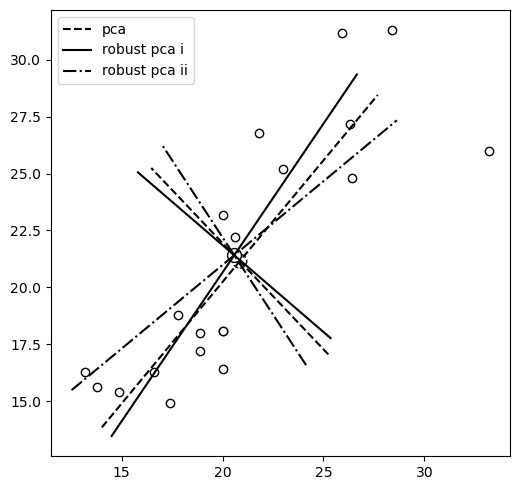

In [60]:
plt.figure(figsize=(5.3,5.0))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]-10*a1_0[0], c0[0], c0[0]+10*a1_0[0]], [c0[1]-10*a1_0[1], c0[1], c0[1]+10*a1_0[1]], 
         c='k', linestyle='--', label='pca')
plt.plot([c0[0]-6*a2_0[0], c0[0], c0[0]+6*a2_0[0]], [c0[1]-6*a2_0[1], c0[1], c0[1]+6*a2_0[1]], 
         c='k', linestyle='--')
plt.plot([c[0]-10*a1[0], c[0], c[0]+10*a1[0]], [c[1]-10*a1[1], c[1], c[1]+10*a1[1]], 
         c='k', label='robust pca i')
plt.plot([c[0]-6*a2[0], c[0], c[0]+6*a2[0]], [c[1]-6*a2[1], c[1], c[1]+6*a2[1]], 
         c='k')
plt.plot([cc[0]-10*A[0,0], cc[0], cc[0]+10*A[0,0]], [cc[1]-10*A[0,1], cc[1], cc[1]+10*A[0,1]], 
         c='k', linestyle='-.', label='robust pca ii')
plt.plot([cc[0]-6*A[1,0], cc[0], cc[0]+6*A[1,0]], [cc[1]-6*A[1,1], cc[1], cc[1]+6*A[1,1]], 
         c='k', linestyle='-.')

plt.legend()
plt.tight_layout()
plt.savefig('fig/robust_pca_kelly_1.eps')
plt.show()

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca_sk = PCA()
pca_sk.fit(X1)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

[[ 0.683  0.731]
 [ 0.731 -0.683]]


array([0.430, 0.345])

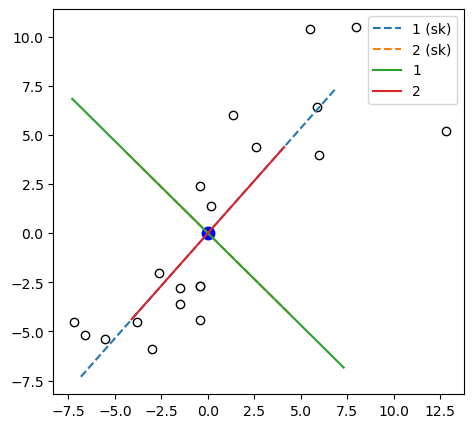

In [33]:
plt.figure(figsize=(5.3,5))
plt.scatter(X1[:,0], X1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-10*AA[0,0], 0, 10*AA[0,0]], [-10*AA[1,0], 0, 10*AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-6*AA[0,1], 0, 6*AA[0,1]], [-6*AA[1,1], 0, 6*AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-10*A[0,0], 0, 10*A[0,0]], [-10*A[1,0], 0, 10*A[1,0]], label='1')
plt.plot([-6*A[0,1], 0, 6*A[0,1]], [-6*A[1,1], 0, 6*A[1,1]], label='2')
plt.legend()
plt.show()